
##  <center>Multivariant Linear Regression from scratch.</center>

------------------

The data we will be using is a ex1data2.txt file which contains a list of bedroom sizes, number of bedrooms and their corresponding price of the house.

The values on the <strong>first column</strong> contains the <strong>bedroom sizes</strong>, the values of the <strong>second column</strong> contains the <strong>number of bedrooms</strong> and values on the <strong>third column</strong> contains the corresponding <strong>price</strong> of the house in Naira.

<strong>Objective</strong>: To build a multivariate linear regression model and the optimization technique to generate a model that will predict reasonable estimate of a house price when it is supplied the customers desired room size and number of rooms.

## 1. Loading Data

In [2]:
''

In [8]:
# Loading dataset
column_names = ["size","bedroom","price"]
data = pd.read_csv('data/ex1data2.txt', names = column_names)

- Display 5 random samples

In [9]:
data.sample(10)

,size,bedroom,price
16,1320,2,299900
19,3031,4,599000
12,1890,3,329999
2,2400,3,369000
1,1600,3,329900
30,1839,2,349900
39,2162,4,287000
45,1852,4,299900
25,1100,3,249900
15,2300,4,449900


In [10]:
data.head()

,size,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [11]:
#convert value of the pandas dataframe into numpy array

data1 = data.values

In [12]:
data1

array([[  2104,      3, 399900],
       [  1600,      3, 329900],
       [  2400,      3, 369000],
       [  1416,      2, 232000],
       [  3000,      4, 539900],
       [  1985,      4, 299900],
       [  1534,      3, 314900],
       [  1427,      3, 198999],
       [  1380,      3, 212000],
       [  1494,      3, 242500],
       [  1940,      4, 239999],
       [  2000,      3, 347000],
       [  1890,      3, 329999],
       [  4478,      5, 699900],
       [  1268,      3, 259900],
       [  2300,      4, 449900],
       [  1320,      2, 299900],
       [  1236,      3, 199900],
       [  2609,      4, 499998],
       [  3031,      4, 599000],
       [  1767,      3, 252900],
       [  1888,      2, 255000],
       [  1604,      3, 242900],
       [  1962,      4, 259900],
       [  3890,      3, 573900],
       [  1100,      3, 249900],
       [  1458,      3, 464500],
       [  2526,      3, 469000],
       [  2200,      3, 475000],
       [  2637,      3, 299900],
       [  

- Data shape

In [14]:
print('data shape: {}, column size: {}, row size: {}' \
      .format(data.shape, data.shape[0], data.shape[1]))

data shape: (47, 3), column size: 47, row size: 3


# 2. Exploratory Data Analysis

In [15]:
# Data Summary
data.describe()

,size,bedroom,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [16]:
# Correlation 
corr = data.corr()
corr.style.background_gradient(cmap='Spectral')

,size,bedroom,price
size,1,0.559967,0.854988
bedroom,0.559967,1,0.442261
price,0.854988,0.442261,1


## 2.1 Visualization

It is a good practice to visualize your data before building a model. The aim of data visualization is to give you an insight on the problem. We will be using matplotlib and seaborn libracy for visuals.

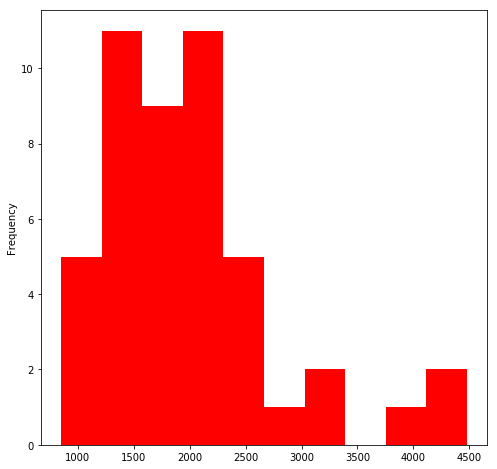

In [17]:
data['size'].plot(kind='hist',figsize=(8,8), color='red')

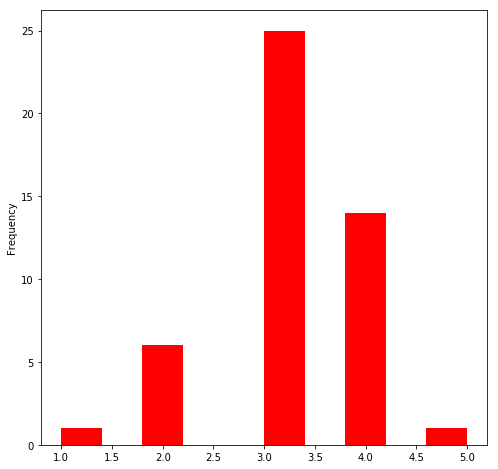

In [18]:
data['bedroom'].plot(kind='hist',figsize=(8,8), color='red')

Text(0.5, 1.0, 'ROOM SIZE VS PRICE')

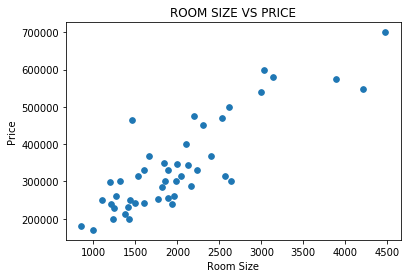

In [19]:
# Lets plot the data to see how they correlate.
plt.scatter(data.loc[:,'size'], data['price'], s=32, marker='o')
plt.xlabel("Room Size")
plt.ylabel("Price")
plt.title("ROOM SIZE VS PRICE")

Text(0.5, 1.0, 'NUMBER OF ROOMS VS PRICE')

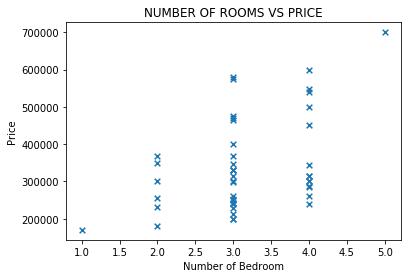

In [20]:
plt.scatter(data.loc[:,'bedroom'], data['price'], s=32, marker='x')
plt.xlabel("Number of Bedroom")
plt.ylabel("Price")
plt.title("NUMBER OF ROOMS VS PRICE")

# 3. Problem Formulation

We have 47 training examples and two independent variable `x` on the first and second column and one dependent variable `y` on the third column

**Recall:**
- Our untrained model is given by: ![title](img/model.gif)
    
- Which you can also be written as ![title](img/model2.gif)

where:
- `y` is the ground truth or output
- `x` is the input values
- `theta` is the <strong>weight or learnable parameters</strong>


Beacuse we have three coefficient of `theta` `( x1, x2)`, we want to create a `97 x 2` matrix that contains the input values on the first column and second column.

Notice that unlike in the last class, we did not create a third column here that contains `ones` which are coefficients for the **bias** `ie (theta0)`. This is because we would still have to normalize the input data. and it makes no sense normalizing `ones`, because we want them to remain as `ones`.

In [171]:
# input values - xs and 1s
nrows = data.shape[0]
ncols = data.shape[1]

x = data.loc[:, ['size','bedroom']].values #converts to Numpy array
x = x.reshape(nrows, 2)  # Alternatively x.reshape(-1,1)

Similarly, we want to create a row vector with a dimension of 47 x 1 for all the output values in our dataset

In [172]:
# output variable 
y = data.loc[:, 'price'].values # convert to Numpy array
y = y.reshape(nrows, 1)

In [173]:
y.shape

(47, 1)

# 4. Feature Normalization

![title](img/prepro1.jpeg)

Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance. 
In this notebook, we will normalize our data using the formula below
![title](img/norm.gif)

In [174]:
def featureNorm(x_data):
    # save the feature data in another variable
    x_norm = x_data.copy()
    
    # Create a row vector of zeros, having the same number of rows as the input feature
    mean = np.mean(x_data, axis=0)
    x_mean = np.mean(x_data[:, :2], axis = 0)
    x_std = np.std(x_data[:, :2], axis = 0)
    
    print('Mean and std of room sizes: {}: {} respectively'.format(x_mean[0],x_std[0]))
    print('Mean and std of bedrooms : {}: {} respectively'.format(x_mean[1],x_std[1]))
    
    # Using the above formula
    x_norm = np.divide((x_data[:, :2] - x_mean), x_std)
    
    # Insert one vector that represents the coefficient of the bias 
    x_norm = np.insert(x_norm, 0, 1, axis=1)
    print('A ones vector has been successfully concatenated to the input feature matrix')
    
    return x_norm, x_mean, x_std

In [175]:
x_norm, x_mean, x_std = featureNorm(x)

Mean and std of room sizes: 2000.6808510638298: 786.2026187430467 respectively
Mean and std of bedrooms : 3.1702127659574466: 0.7528428090618781 respectively
A ones vector has been successfully concatenated to the input feature matrix


In [176]:
x_norm

array([[ 1.00000000e+00,  1.31415422e-01, -2.26093368e-01],
       [ 1.00000000e+00, -5.09640698e-01, -2.26093368e-01],
       [ 1.00000000e+00,  5.07908699e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.43677059e-01, -1.55439190e+00],
       [ 1.00000000e+00,  1.27107075e+00,  1.10220517e+00],
       [ 1.00000000e+00, -1.99450507e-02,  1.10220517e+00],
       [ 1.00000000e+00, -5.93588523e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.29685755e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.89466782e-01, -2.26093368e-01],
       [ 1.00000000e+00, -6.44465993e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.71822042e-02,  1.10220517e+00],
       [ 1.00000000e+00, -8.65999486e-04, -2.26093368e-01],
       [ 1.00000000e+00, -1.40779041e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.15099326e+00,  2.43050370e+00],
       [ 1.00000000e+00, -9.31923697e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.80715024e-01,  1.10220517e+00],
       [ 1.00000000e+00, -8.65782986e-01

In [275]:
x_norm.size

141

-----------------------------------

# 5. Training

Recall from the class, the process to training a linear regression model is as follow.

We want to find the appropriate value of `theta` that will give us a good estimate of a city's profit if lthe city's population is supplied.

To do this, 
- We want to start with a random value of `theta` to generate a hypothesis
![title](img/model3.gif)

- Then continually correct values of `theta` until the deviation of the hypothesis/prediction `h` from the ground-truth `y` is greatly reduced

**Note:** In the last class, we used something like this `theta = [[0],[0],[0]]` to initialize the values of theta. Going forward, we will use the numpy function to initialize the values of theta, because we could have large number of theta values. ie `theta = np.zeros(3,1)`

In [177]:
def train(x,y, print_every):
    #print_every = 40
    iteration = 1000
    
    # For this practice are initiallizing are theta with values of zero.
    theta = np.zeros((3,1))
    
    # Here, want to save our cost function or loss or square error, 
    # so that we can have an idea of how the deviation of the hypothesis from the ground thruth reduces
    cost_function = np.zeros(iteration)
    
    for i in range(0, iteration):
        # Step 1: we make a prediction using the random weights (theta) that we initialized
        # @ is a fancy way do performing dot products
        h = x @ theta
        
        # Step 2: We take a step to correct the weights (theta) to that the next predicion will be better
        theta = update_weight(h, theta, x)
        
        # Step 3: We measure the deviation or error
        cost_function[i] = cost(x, theta)
        
        if i % print_every == 0:
            #print("Running Gradient Descent. Iteration: {} cost function: {}".format(np.log(iteration,cost_function[i]))
            print("Iteration: {}, Cost function: {} ".format(i, np.log(cost_function[i])))
        
    return theta, cost_function

But how do we check the error like we defined above?

Remember the error formular (cost function)? 
![title](img/model44.gif)

where:
- `m` is the number of training example
- `x` is the input data
- `h` is the hypothesis
- `y` is the prediction

The equation tries to find the square error between the ground truth and the prediction.


In [178]:
def cost(x, theta):
    m = x[:,0].size
    h = x @ theta
    return (1/2*m) * np.sum(np.square(h - y))

Now that we are able to get a sense of the error, how do we update how weight (theta) such that is predicts better?

Like we discussed in class, gradient descent algorithim will be used for this purpose.

The general formular for gradient is given below:
![title](img/model6.gif)
which can be differentiated to give:
![title](img/model5.gif)
where
- alpha is the learning rate

ie: we continually update the weight(theta) by taking steps(alpha) for the derived gradient of the error until we have sufficiently minimized theta.

In [179]:
def update_weight(h, theta, x):
    m = x[:,0].size
    alpha = 0.01
    theta = theta - alpha * (1/m * (x.T @ (h - y)))
    return theta

Now, lets pass in our data and train.

In [180]:
theta, cost_values = train(x_norm, y, 50)

Iteration: 0, Cost function: 32.58708608705592 
Iteration: 50, Cost function: 31.62646524555142 
Iteration: 100, Cost function: 30.768400809214164 
Iteration: 150, Cost function: 30.08272384143107 
Iteration: 200, Cost function: 29.624009990129288 
Iteration: 250, Cost function: 29.371264793925242 
Iteration: 300, Cost function: 29.249620101863503 
Iteration: 350, Cost function: 29.193821914890535 
Iteration: 400, Cost function: 29.16773135344796 
Iteration: 450, Cost function: 29.154828494508877 
Iteration: 500, Cost function: 29.14800073351936 
Iteration: 550, Cost function: 29.144156595722503 
Iteration: 600, Cost function: 29.141885780791473 
Iteration: 650, Cost function: 29.140499092567108 
Iteration: 700, Cost function: 29.1396341211269 
Iteration: 750, Cost function: 29.13908754832646 
Iteration: 800, Cost function: 29.138739515618084 
Iteration: 850, Cost function: 29.138516916385527 
Iteration: 900, Cost function: 29.138374179274354 
Iteration: 950, Cost function: 29.13828251

In [181]:
# Now, lets see our trained weights
print('Our learned value of theta: ',theta.ravel())

Our learned value of theta:  [340397.96353532 108742.65627238  -5873.22993383]


Lets visualize how or error reduced during the iteration. This is the power of gradient descent. 

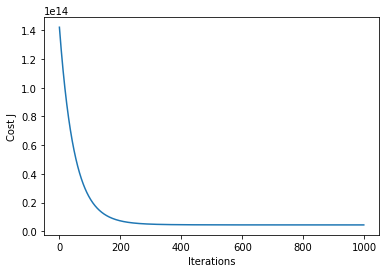

In [182]:
plt.plot(cost_values)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

Notice that at the `400th iteration`, the model doesnt really change anymore. You should actually stop the iteration at that time and save cost of processing

## Predict

Lets write a predict function that takes in the input features and produces an estimate price for the type of house desired

In [183]:
def predict(theta, x_mean, x_std):
    input_size = float(input("Input the size (square feet) of house you want: "))
    input_bedrooms = float(input("Input the number of bedrooms you desire: "))
    print("\n Calculating -- -- -- -- -- -- -- \n")
    
    # input vector
    input_vec = np.array([input_size, input_bedrooms])
    
    #print(input_vec_bias)
    
    # normalization of input vector
    input_norm = np.divide((input_vec -  x_mean), x_std)
    
     # input vector with bias
    input_vec_bias = np.insert(input_norm,0, 1)
    
    price = input_vec_bias @ theta
    print("For a house of size {} sqft, with {} bedrooms. The price of estimate is N{}".format(input_size,input_bedrooms,price[0]))

In [184]:
predict(theta, x_mean, x_std)

Input the size (square feet) of house you want: 2526
Input the number of bedrooms you desire: 3

 Calculating -- -- -- -- -- -- -- 

For a house of size 2526.0 sqft, with 3.0 bedrooms. The price of estimate is N414384.73921779


-------------------

## Learning Rates

But what ius the effect of varying learning rates in the optimization of our weights?
Below, we will plot the effect of different learning on the optimization of theta.

Study the code for the next 5 mins...

In [185]:
# Choose some alpha value
alphas = [1,0,0.1,0.012]

def update_weight_r(h, theta, x, alpha):
    m = x[:,0].size
    theta = theta - alpha * (1/m * (x.T @ (h - y)))
    return theta

def cost_r(x):
    J = []
    theta = [[0],[0],[0]]
    iteration = 400
    for i in alphas:
        alpha = i
        m = x[:,0].size
        J_alpha = []
        for i in range(iteration):
            h = x @ theta
            theta = update_weight_r(h, theta, x, alpha)
            cost = (1/2*m) * np.sum(np.square(h - y))
            J_alpha.append(cost)
        # reset theta to zero
        theta = [[0],[0],[0]]
        J.append(J_alpha)
    return J


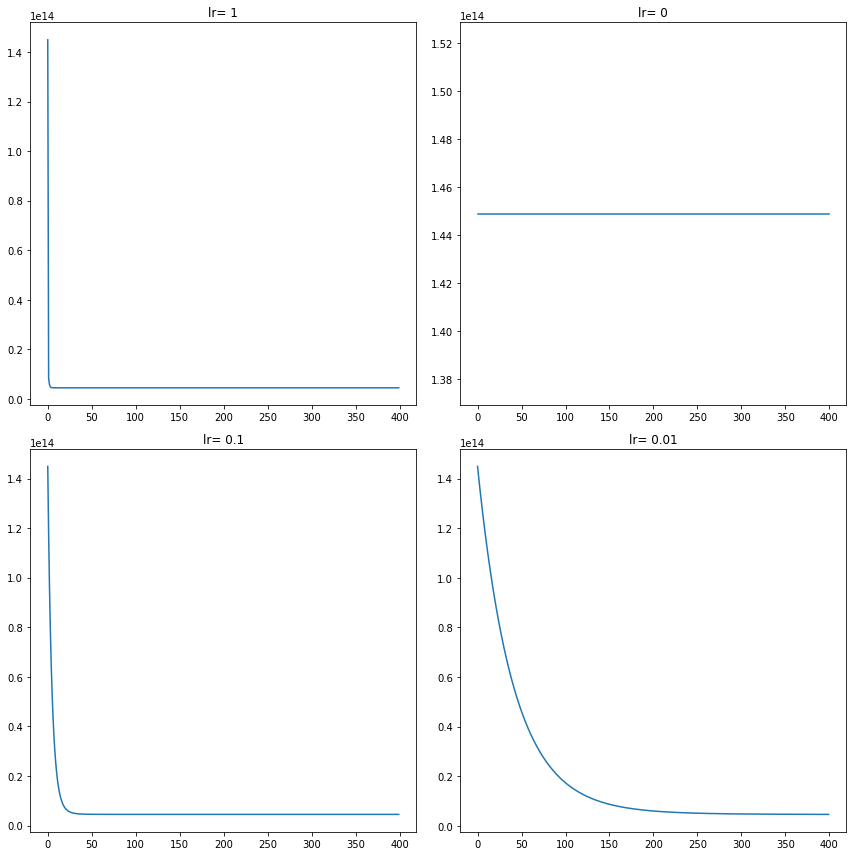

In [186]:
# Lets pass in the value of x into our function defined above 
cost_alpha = cost_r(x_norm)

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.plot(cost_alpha[0])
plt.title('lr= 1')

plt.subplot(2,2,2)
plt.plot(cost_alpha[1])
plt.title('lr= 0')

plt.subplot(2,2,3)
plt.plot(cost_alpha[2])
plt.title('lr= 0.1')

plt.subplot(2,2,4)
plt.plot(cost_alpha[3])
plt.title('lr= 0.01')

plt.tight_layout()

**Class Discussion/Assignment:** What did you notice in this plots

-----------------

# 7. Normal Equation (Analytical Method)

$$\theta = (X^TX)^{-1}X^T\vec{y}$$
Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no \loop until convergence" like in gradient descent.

Complete the code in normaleqn.py to use the formula above to calculate $\theta$. Remember that while you don't need to scale your features, we still need to add a column of 1's to the X matrix to have an intercept term

In [187]:
# lets define the formula in a function
def normalEqn(X,y):
    return np.dot((np.linalg.inv(np.dot(X.T,X))),np.dot(X.T,y))

In [188]:
# Lets pass in our input values the have not been normalized
x_non_norm = n_data = np.insert(data.iloc[:,:2].values,0,1, axis=1)

theta_analytical = normalEqn(x_non_norm, y)

# Display normal equation's result
print ('Theta computed from the normal equations:')
print (' %s \n' % theta_analytical)

Theta computed from the normal equations:
 [[89597.9095428 ]
 [  139.21067402]
 [-8738.01911233]] 



In [189]:
#Predict
def predict_analytical(theta):
    input_size = float(input("Input the size (square feet) of house you want: "))
    input_bedrooms = float(input("Input the number of bedrooms you desire: "))
    print("\nCalculating... ... ... ... ... ...\n")
    input_vec = np.array([[1, input_size, input_bedrooms]])
    
    
    price = input_vec @ theta
    print("For a house of size ", input_size, "sqft, with ", input_bedrooms, "bedrooms, \nThe price estimate is N", price[0][0])

In [190]:
predict_analytical(theta_analytical)

Input the size (square feet) of house you want: 2526
Input the number of bedrooms you desire: 3

Calculating... ... ... ... ... ...

For a house of size  2526.0 sqft, with  3.0 bedrooms, 
The price estimate is N 415030.01477433724


--------------------------------

## Assignment:

1. Use `scikit-learn` to develop a linear regression model using the same dataset in this practice and compare result.
2. Explore the internet for an multivariant dataset and use this algorithim to train a linear regression model. Use `scikit-learn` too
3. Rewrite the train function such that we pass `'iteration',` and `'alpha'` as arguments.
4. What did you observe about the changing the `learning rate`?

Assignment is due for submission on `03/10/2019`.

Submission link will be posted on the `SLACK CHANNEL`

-------------------------

# Credit

This exercise is adopted from [Andrew Ng Machine Learning Course](https://www.coursera.org/learn/machine-learning)

In [46]:
data.head()

,size,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
size       47 non-null int64
bedroom    47 non-null int64
price      47 non-null int64
dtypes: int64(3)
memory usage: 1.2 KB


In [48]:
data.describe()

,size,bedroom,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [49]:
import seaborn as sns

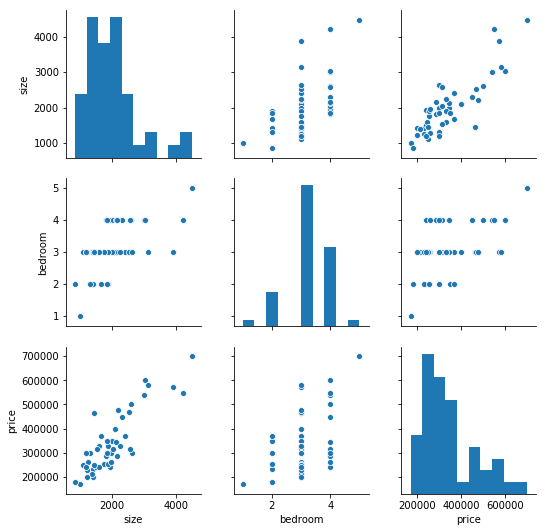

In [50]:
sns.pairplot(data)

C:\Users\odubela\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


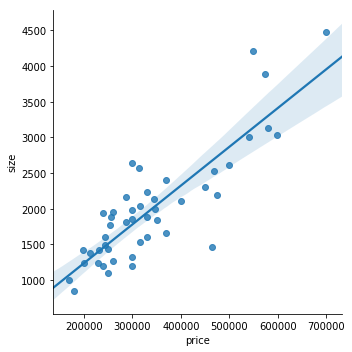

In [255]:
sns.lmplot(x='price',y='size',data = data)

In [103]:
X_skl = data.iloc[: , :-1].values
X_skl.shape

(47, 2)

In [101]:
y_skl = data.iloc[:, 2].values
y_skl

array([399900, 329900, 369000, 232000, 539900, 299900, 314900, 198999,
       212000, 242500, 239999, 347000, 329999, 699900, 259900, 449900,
       299900, 199900, 499998, 599000, 252900, 255000, 242900, 259900,
       573900, 249900, 464500, 469000, 475000, 299900, 349900, 169900,
       314900, 579900, 285900, 249900, 229900, 345000, 549000, 287000,
       368500, 329900, 314000, 299000, 179900, 299900, 239500],
      dtype=int64)

In [87]:
from sklearn.model_selection import train_test_split

In [257]:
X_train, X_test, y_train, y_test = train_test_split(
                        X_skl, y_skl, test_size=0.3, random_state =  42)

In [258]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import metrics

lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [259]:
predictions = model.predict( X_test)

In [260]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 68295.6637275707
MSE: 7611089615.010203
RMSE: 87241.5589900261


In [261]:
print('Coefficients: \n', model.coef_)

Coefficients: 
 [  131.12253589 -2825.22573808]


In [262]:
X_train.shape

(32, 2)

In [263]:
y_train.shape

(32,)

Text(0, 0.5, 'Predicted Y')

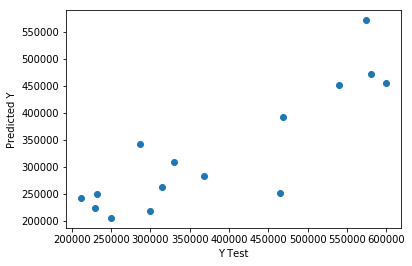

In [264]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

C:\Users\odubela\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


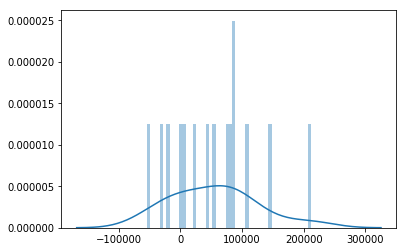

In [265]:
import seaborn as sns
sns.distplot((y_test-predictions),bins=50);

In [266]:
print(model.intercept_)

69599.05822335609


In [267]:
#creating a dataset from the test data
dataset= pd.DataFrame(X_test, columns = ['X1','X2']) 

In [268]:
dataset['y'] = y_test

In [269]:
dataset['y_pred'] = predictions

In [270]:
dataset.head()

,X1,X2,y,y_pred
0,2526,3,469000,392338.906658
1,2162,4,287000,341785.077857
2,1458,3,464500,252300.038331
3,1200,3,299000,218470.424073
4,3890,3,573900,571190.045607


In [271]:
#Slicing out the Actual outout(y) and Predicted output (yhat)
result = dataset[['y', 'y_pred']]

In [272]:
#creating a column in the result to store mean errors from all observations
n = len(dataset)

#Error from each prediction
result['error'] = dataset['y'].subtract(dataset['y_pred'])

print(result)

#summation of all error function from all predictions
cost_function = abs(result['error']).sum()

Mean_Absolute_Error = cost_function / n




print()


         y         y_pred          error
0   469000  392338.906658   76661.093342
1   287000  341785.077857  -54785.077857
2   464500  252300.038331  212199.961669
3   299000  218470.424073   80529.575927
4   573900  571190.045607    2709.954393
5   229900  223584.202972    6315.797028
6   329999  308944.973834   21054.026166
7   599000  455730.561543  143269.438457
8   539900  451665.762930   88234.237070
9   249900  205358.170484   44541.829516
10  212000  242072.480532  -30072.480532
11  232000  249618.117562  -17618.117562
12  314900  262265.351059   52634.648941
13  368500  282136.506462   86363.493538
14  579900  472454.776085  107445.223915



C:\Users\odubela\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [273]:
print(cost_function)
print(Mean_Absolute_Error)

1024434.9559135605
68295.6637275707


In [274]:
predictions

array([392338.90665807, 341785.07785735, 252300.03833143, 218470.42407275,
       571190.04560707, 223584.20297232, 308944.97383434, 455730.5615426 ,
       451665.76293013, 205358.17048411, 242072.4805323 , 249618.11756229,
       262265.3510588 , 282136.50646211, 472454.77608464])

In [227]:
X_skl1 = X_skl[:,:-1]

In [230]:
from sklearn.preprocessing import StandardScaler
StandSc = StandardScaler()
StandSc = StandSc.fit(X_skl1)
X_StandSc = StandSc.transform(X_skl1)
X_StandSc.shape

C:\Users\odubela\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\odubela\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(47, 1)

In [232]:
#creating a dataset from the test data
X = pd.DataFrame(X_skl, columns = ['X1','X2']) 

In [234]:
X ['X1_StdSc'] = X_StandSc

In [239]:
X_std = X.iloc[:,1:3]

In [242]:
X_sctrain, X_sctest, y_sctrain, y_sctest = train_test_split(
                        X_std, y_skl, test_size=0.3, random_state = 42)

In [246]:
lr1= linear_model.LinearRegression()
model1 = lr1.fit(X_sctrain, y_sctrain)

In [247]:
predictions1 = model1.predict(X_sctest)

In [248]:
print('MAE:', metrics.mean_absolute_error(y_sctest, predictions1))
print('MSE:', metrics.mean_squared_error(y_sctest, predictions1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_sctest, predictions1)))

MAE: 68295.66372757075
MSE: 7611089615.010212
RMSE: 87241.55899002614


In [249]:
result = np.array([predictions1, y_sctest])
print(result)

[[392338.90665807 341785.07785735 252300.03833143 218470.42407275
  571190.04560707 223584.20297232 308944.97383434 455730.5615426
  451665.76293013 205358.17048411 242072.4805323  249618.11756229
  262265.3510588  282136.50646211 472454.77608464]
 [469000.         287000.         464500.         299000.
  573900.         229900.         329999.         599000.
  539900.         249900.         212000.         232000.
  314900.         368500.         579900.        ]]


In [254]:
#creating a dataset from the test data
dataset1= pd.DataFrame(X_sctest, columns = ['X2']) 
dataset1['y'] = y_sctest
dataset1['y_pred'] = predictions1
dataset1['error'] = y_sctest - predictions1
dataset1.head()

,X2,y,y_pred,error
27,3,469000,392338.906658,76661.093342
39,4,287000,341785.077857,-54785.077857
26,3,464500,252300.038331,212199.961669
43,3,299000,218470.424073,80529.575927
24,3,573900,571190.045607,2709.954393
